In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('thinkschool_shorts.csv')

In [90]:
df.head()

,video_id,title,published_at,view_count,like_count,comment_count,duration,hours,minutes,seconds,podcast,total_seconds,duration_minutes,is_short_strict
0,lBCiFPh87ik,Packaging You Can't Ignore!,2025-11-27T06:50:02Z,7050,358,2,PT37S,0,0,37,No,37,0.616667,True
1,-XLYBiMJDI0,How can India go global?,2025-11-26T11:30:00Z,21961,446,2,PT52S,0,0,52,No,52,0.866667,True
2,XczYinm2pQc,Smart Founders Don’t Ask… They Observe,2025-11-25T12:45:11Z,24199,432,1,PT37S,0,0,37,No,37,0.616667,True
3,9c3FuuqNOCM,Easiest Way to Make Your Brand Memorable !,2025-11-24T16:29:39Z,30815,514,1,PT27S,0,0,27,No,27,0.450000,True
4,028kXj_TvBE,Why do startups fail?,2025-11-23T04:30:01Z,32249,814,2,PT45S,0,0,45,No,45,0.750000,True


### Cleaning the data and removing unnecessary columns

In [91]:
df = df.drop(columns=['video_id', 'podcast', 'is_short_strict'])

In [92]:
df.head()

,title,published_at,view_count,like_count,comment_count,duration,hours,minutes,seconds,total_seconds,duration_minutes
0,Packaging You Can't Ignore!,2025-11-27T06:50:02Z,7050,358,2,PT37S,0,0,37,37,0.616667
1,How can India go global?,2025-11-26T11:30:00Z,21961,446,2,PT52S,0,0,52,52,0.866667
2,Smart Founders Don’t Ask… They Observe,2025-11-25T12:45:11Z,24199,432,1,PT37S,0,0,37,37,0.616667
3,Easiest Way to Make Your Brand Memorable !,2025-11-24T16:29:39Z,30815,514,1,PT27S,0,0,27,27,0.450000
4,Why do startups fail?,2025-11-23T04:30:01Z,32249,814,2,PT45S,0,0,45,45,0.750000


#### Changing the duration column format from 'PT{no. of secs}S' to 'no. of secs'

In [93]:
import re

In [94]:
def iso_to_seconds(duration):
    """
    Convert ISO 8601 duration like PT45S, PT1M14S, PT1H20M26S → total seconds.
    """
    pattern = r'PT(?:(\d+)S)?'
    s = re.match(pattern, duration)
    return s

In [95]:
df['duration_seconds'] = df['duration'].apply(iso_to_seconds)

In [96]:
df.head()

,title,published_at,view_count,like_count,comment_count,duration,hours,minutes,seconds,total_seconds,duration_minutes,duration_seconds
0,Packaging You Can't Ignore!,2025-11-27T06:50:02Z,7050,358,2,PT37S,0,0,37,37,0.616667,"<re.Match object; span=(0, 5), match='PT37S'>"
1,How can India go global?,2025-11-26T11:30:00Z,21961,446,2,PT52S,0,0,52,52,0.866667,"<re.Match object; span=(0, 5), match='PT52S'>"
2,Smart Founders Don’t Ask… They Observe,2025-11-25T12:45:11Z,24199,432,1,PT37S,0,0,37,37,0.616667,"<re.Match object; span=(0, 5), match='PT37S'>"
3,Easiest Way to Make Your Brand Memorable !,2025-11-24T16:29:39Z,30815,514,1,PT27S,0,0,27,27,0.450000,"<re.Match object; span=(0, 5), match='PT27S'>"
4,Why do startups fail?,2025-11-23T04:30:01Z,32249,814,2,PT45S,0,0,45,45,0.750000,"<re.Match object; span=(0, 5), match='PT45S'>"


#### Dropping columns

In [97]:
df = df.drop(columns=['duration', 'hours', 'minutes', 'total_seconds', 'duration_minutes', 'duration_seconds'])

In [98]:
df.head()

,title,published_at,view_count,like_count,comment_count,seconds
0,Packaging You Can't Ignore!,2025-11-27T06:50:02Z,7050,358,2,37
1,How can India go global?,2025-11-26T11:30:00Z,21961,446,2,52
2,Smart Founders Don’t Ask… They Observe,2025-11-25T12:45:11Z,24199,432,1,37
3,Easiest Way to Make Your Brand Memorable !,2025-11-24T16:29:39Z,30815,514,1,27
4,Why do startups fail?,2025-11-23T04:30:01Z,32249,814,2,45


#### Extracting date

In [99]:
df['published_at'] = pd.to_datetime(df['published_at'])
df['published_date'] = df['published_at'].dt.date

In [100]:
df.head()

,title,published_at,view_count,like_count,comment_count,seconds,published_date
0,Packaging You Can't Ignore!,2025-11-27 06:50:02+00:00,7050,358,2,37,2025-11-27
1,How can India go global?,2025-11-26 11:30:00+00:00,21961,446,2,52,2025-11-26
2,Smart Founders Don’t Ask… They Observe,2025-11-25 12:45:11+00:00,24199,432,1,37,2025-11-25
3,Easiest Way to Make Your Brand Memorable !,2025-11-24 16:29:39+00:00,30815,514,1,27,2025-11-24
4,Why do startups fail?,2025-11-23 04:30:01+00:00,32249,814,2,45,2025-11-23


In [101]:
df = df.drop(columns=['published_at'])

In [102]:
df.head()

,title,view_count,like_count,comment_count,seconds,published_date
0,Packaging You Can't Ignore!,7050,358,2,37,2025-11-27
1,How can India go global?,21961,446,2,52,2025-11-26
2,Smart Founders Don’t Ask… They Observe,24199,432,1,37,2025-11-25
3,Easiest Way to Make Your Brand Memorable !,30815,514,1,27,2025-11-24
4,Why do startups fail?,32249,814,2,45,2025-11-23


In [103]:
df = df.rename(columns={'seconds':'duration (in seconds)'})

In [104]:
df.head()

,title,view_count,like_count,comment_count,duration (in seconds),published_date
0,Packaging You Can't Ignore!,7050,358,2,37,2025-11-27
1,How can India go global?,21961,446,2,52,2025-11-26
2,Smart Founders Don’t Ask… They Observe,24199,432,1,37,2025-11-25
3,Easiest Way to Make Your Brand Memorable !,30815,514,1,27,2025-11-24
4,Why do startups fail?,32249,814,2,45,2025-11-23


#### Extracting year, month and date from the published_date column

In [105]:
df['published_date'] = pd.to_datetime(df['published_date'])

In [106]:
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['day'] = df['published_date'].dt.day

In [107]:
df.head()

,title,view_count,like_count,comment_count,duration (in seconds),published_date,year,month,day
0,Packaging You Can't Ignore!,7050,358,2,37,2025-11-27,2025,11,27
1,How can India go global?,21961,446,2,52,2025-11-26,2025,11,26
2,Smart Founders Don’t Ask… They Observe,24199,432,1,37,2025-11-25,2025,11,25
3,Easiest Way to Make Your Brand Memorable !,30815,514,1,27,2025-11-24,2025,11,24
4,Why do startups fail?,32249,814,2,45,2025-11-23,2025,11,23


In [108]:
df.shape

(310, 9)

#### Creating Word Count column to find the count of words in title

In [109]:
df['word_count_in_title'] = df['title'].str.split().str.len()

In [110]:
df.head()

,title,view_count,like_count,comment_count,duration (in seconds),published_date,year,month,day,word_count_in_title
0,Packaging You Can't Ignore!,7050,358,2,37,2025-11-27,2025,11,27,4
1,How can India go global?,21961,446,2,52,2025-11-26,2025,11,26,5
2,Smart Founders Don’t Ask… They Observe,24199,432,1,37,2025-11-25,2025,11,25,6
3,Easiest Way to Make Your Brand Memorable !,30815,514,1,27,2025-11-24,2025,11,24,8
4,Why do startups fail?,32249,814,2,45,2025-11-23,2025,11,23,4


In [111]:
df.shape

(310, 10)

### Saving the dataset

In [112]:
df.to_csv('think_school_shorts_final.csv')

## Reading the dataset

In [113]:
df = pd.read_csv('think_school_shorts_final.csv')

In [114]:
df.head()

,Unnamed: 0,title,view_count,like_count,comment_count,duration (in seconds),published_date,year,month,day,word_count_in_title
0,0,Packaging You Can't Ignore!,7050,358,2,37,2025-11-27,2025,11,27,4
1,1,How can India go global?,21961,446,2,52,2025-11-26,2025,11,26,5
2,2,Smart Founders Don’t Ask… They Observe,24199,432,1,37,2025-11-25,2025,11,25,6
3,3,Easiest Way to Make Your Brand Memorable !,30815,514,1,27,2025-11-24,2025,11,24,8
4,4,Why do startups fail?,32249,814,2,45,2025-11-23,2025,11,23,4


In [115]:
df = df.drop(columns=['Unnamed: 0'])

In [116]:
df.head()

,title,view_count,like_count,comment_count,duration (in seconds),published_date,year,month,day,word_count_in_title
0,Packaging You Can't Ignore!,7050,358,2,37,2025-11-27,2025,11,27,4
1,How can India go global?,21961,446,2,52,2025-11-26,2025,11,26,5
2,Smart Founders Don’t Ask… They Observe,24199,432,1,37,2025-11-25,2025,11,25,6
3,Easiest Way to Make Your Brand Memorable !,30815,514,1,27,2025-11-24,2025,11,24,8
4,Why do startups fail?,32249,814,2,45,2025-11-23,2025,11,23,4


In [117]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

### Average view_count vs duration

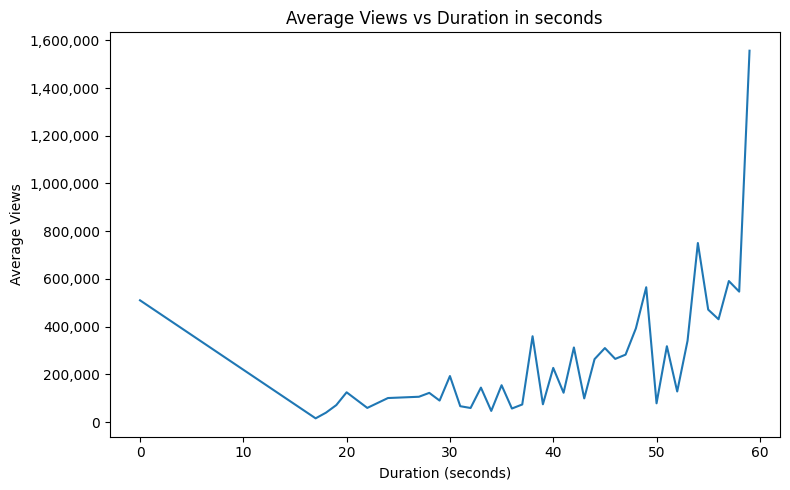

In [172]:
import matplotlib.ticker as mtick
avg_view_duration = df.groupby('duration (in seconds)')['view_count'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(avg_view_duration['duration (in seconds)'], avg_view_duration['view_count'])
plt.title("Average Views vs Duration in seconds")
plt.xlabel("Duration (seconds)")
plt.ylabel("Average Views")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

### Average like_count vs duration

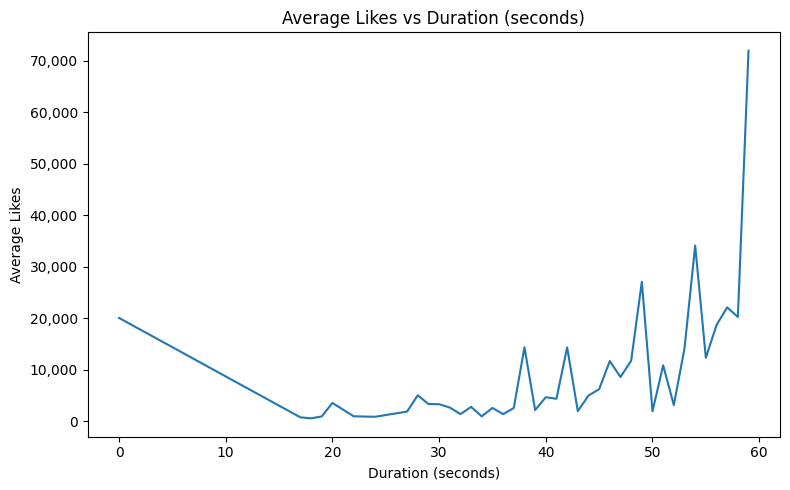

In [173]:
avg_like_duration = df.groupby('duration (in seconds)')['like_count'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(avg_like_duration['duration (in seconds)'], avg_like_duration['like_count'])
plt.title("Average Likes vs Duration (seconds)")
plt.xlabel("Duration (seconds)")
plt.ylabel("Average Likes")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

### Average comment_count vs duration

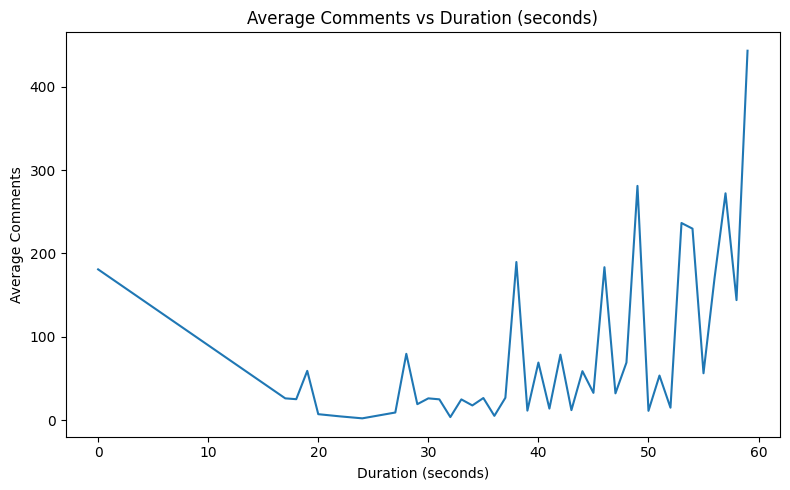

In [174]:
avg_comment_duration = df.groupby('duration (in seconds)')['comment_count'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(avg_comment_duration['duration (in seconds)'], avg_comment_duration['comment_count'])
plt.title("Average Comments vs Duration (seconds)")
plt.xlabel("Duration (seconds)")
plt.ylabel("Average Comments")
plt.tight_layout()
plt.show()

### Year + Month Wise Average Views

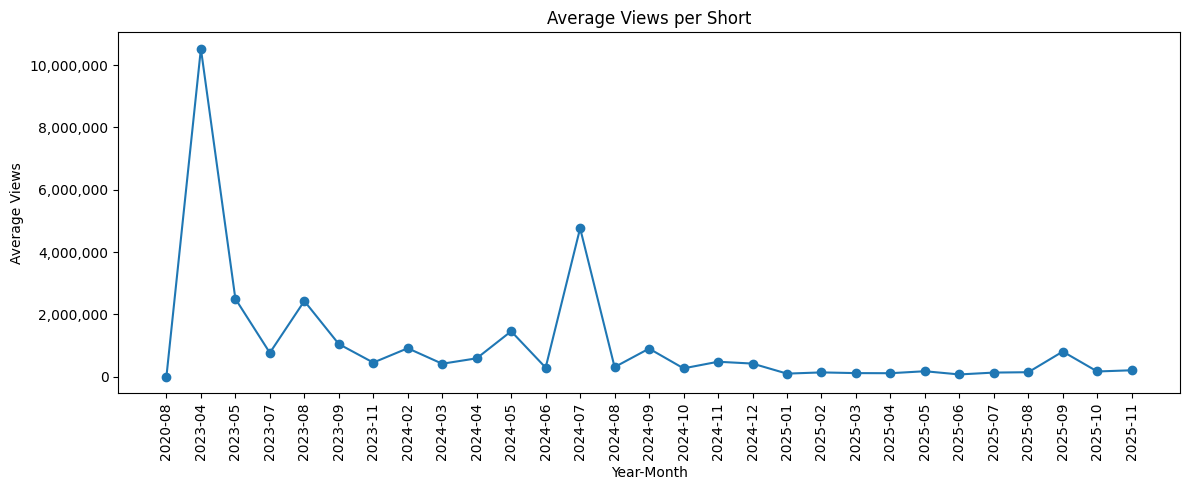

In [170]:
import matplotlib.ticker as mtick

df['year_month'] = df['published_date'].dt.to_period('M').astype(str)

ym_views = df.groupby('year_month').agg(
    total_views=('view_count','sum'),
    n_videos=('title','count')
).reset_index()

ym_views['avg_views'] = ym_views['total_views'] / ym_views['n_videos']
ym_views = ym_views.sort_values('year_month')

plt.figure(figsize=(12,5))
plt.plot(ym_views['year_month'], ym_views['avg_views'], marker='o')
plt.title("Average Views per Short")
plt.xlabel("Year-Month")
plt.ylabel("Average Views")
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

### Year + Month Wise Average Likes

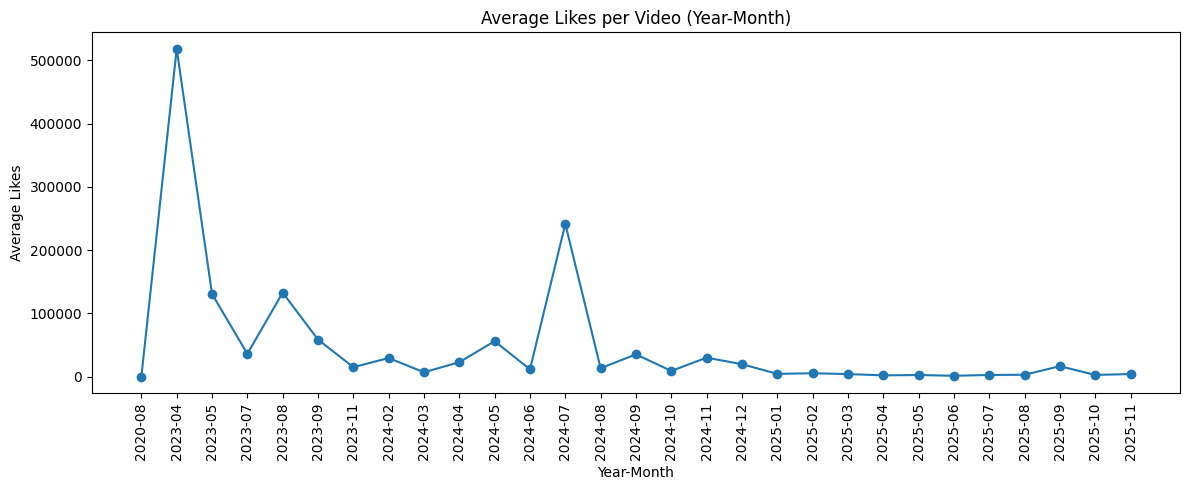

In [127]:
ym_likes = df.groupby('year_month').agg(
    total_likes=('like_count','sum'),
    n_videos=('title','count')
).reset_index()

ym_likes['avg_likes'] = ym_likes['total_likes'] / ym_likes['n_videos']
ym_likes = ym_likes.sort_values('year_month')

plt.figure(figsize=(12,5))
plt.plot(ym_likes['year_month'], ym_likes['avg_likes'], marker='o')
plt.title("Average Likes per Video (Year-Month)")
plt.xlabel("Year-Month")
plt.ylabel("Average Likes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Best Short

In [129]:
best_short = df.loc[df['view_count'].idxmax()]
best_short

title                    How did cold messaging help Ranveer get @tanma...
view_count                                                        14143525
like_count                                                          717842
comment_count                                                          927
duration (in seconds)                                                   59
published_date                                         2024-07-30 00:00:00
year                                                                  2024
month                                                                    7
day                                                                     30
word_count_in_title                                                     12
year_month                                                         2024-07
Name: 262, dtype: object

In [130]:
top5 = df.nlargest(5, 'view_count')
cols = ['video_id','title','published_date','view_count','like_count','comment_count','duration','total_seconds']
cols = [c for c in cols if c in top5.columns]

In [131]:
display(top5[cols].reset_index(drop=True))

,title,published_date,view_count,like_count,comment_count
0,How did cold messaging help Ranveer get @tanma...,2024-07-30,14143525,717842,927
1,Why Apple Inc. chose INDIA over CHINA? @ThinkS...,2023-04-28,10527523,518376,3550
2,Can UP become 1 Trillion Dollar Economy?,2024-05-11,3863749,150580,2080
3,How Fogg (the deodorant) used a Simple Marketi...,2023-08-05,3608851,186722,655
4,How Veeba got Domino's as a client?,2024-09-23,3233397,124643,416


In [134]:
df.shape

(310, 11)

In [142]:
df['published_date'].max()

Timestamp('2025-11-27 00:00:00')

In [143]:
df.columns

Index(['title', 'view_count', 'like_count', 'comment_count',
       'duration (in seconds)', 'published_date', 'year', 'month', 'day',
       'word_count_in_title', 'year_month'],
      dtype='object')

### Upload Frequency

In [144]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

In [145]:
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month_name()
df['week'] = df['published_date'].dt.isocalendar().week
df['day']  = df['published_date'].dt.date

In [146]:
uploads_per_month = df.groupby(['year','month']).size().reset_index(name='upload_count')
uploads_per_month

,year,month,upload_count
0,2020,August,1
1,2023,April,1
2,2023,August,3
3,2023,July,2
4,2023,May,1
5,2023,November,1
6,2023,September,1
7,2024,April,17
8,2024,August,17
9,2024,December,22


In [147]:
uploads_per_year = df.groupby('year').size().reset_index(name='upload_count')
uploads_per_year

,year,upload_count
0,2020,1
1,2023,9
2,2024,110
3,2025,190


In [148]:
uploads_per_week = df.groupby(['year','week']).size().reset_index(name='upload_count')
uploads_per_week

,year,week,upload_count
0,2020,33,1
1,2023,17,1
2,2023,18,1
3,2023,29,1
4,2023,30,1
...,...,...,...
81,2025,44,2
82,2025,45,2
83,2025,46,2
84,2025,47,5


In [149]:
uploads_per_day = df.groupby('day').size().reset_index(name='upload_count')
uploads_per_day

,day,upload_count
0,2020-08-16,1
1,2023-04-28,1
2,2023-05-06,1
3,2023-07-21,1
4,2023-07-27,1
...,...,...
187,2025-11-23,1
188,2025-11-24,1
189,2025-11-25,1
190,2025-11-26,1


In [161]:
avg_monthly_uploads = uploads_per_month['upload_count'].mean()
avg_monthly_uploads

np.float64(10.689655172413794)

In [151]:
avg_weekly_uploads = uploads_per_week['upload_count'].mean()
avg_weekly_uploads

np.float64(3.604651162790698)

### Average Duration

In [152]:
df['duration (in seconds)'].mean()

np.float64(41.0)

### Average Views

In [154]:
df['view_count'].mean().round(-2)

np.float64(415500.0)

### Average Likes

In [156]:
df['like_count'].mean().round(-2)

np.float64(16300.0)

### Total Views

In [157]:
df['view_count'].sum()

np.int64(128790267)

### Total duration

In [158]:
df['duration (in seconds)'].sum()

np.int64(12710)

In [159]:
12710/60

211.83333333333334

### Distribution of duration

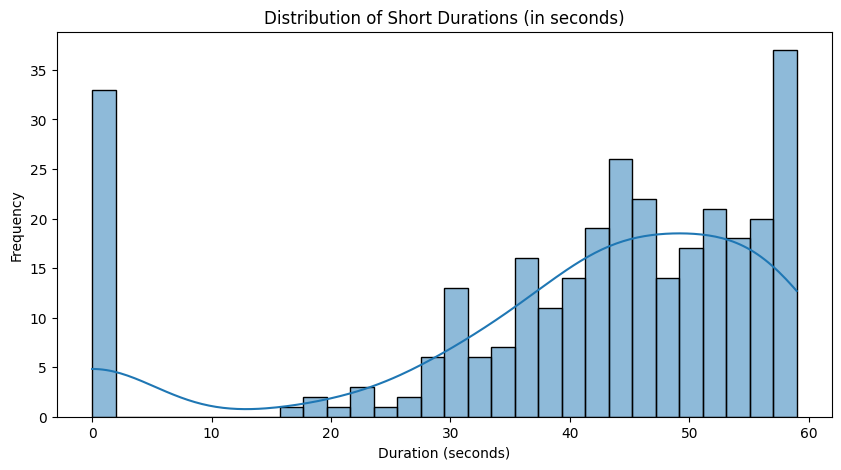

In [168]:
plt.figure(figsize=(10,5))
sns.histplot(df['duration (in seconds)'], bins=30, kde=True)
plt.title("Distribution of Short Durations (in seconds)")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

### Distribution of views

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


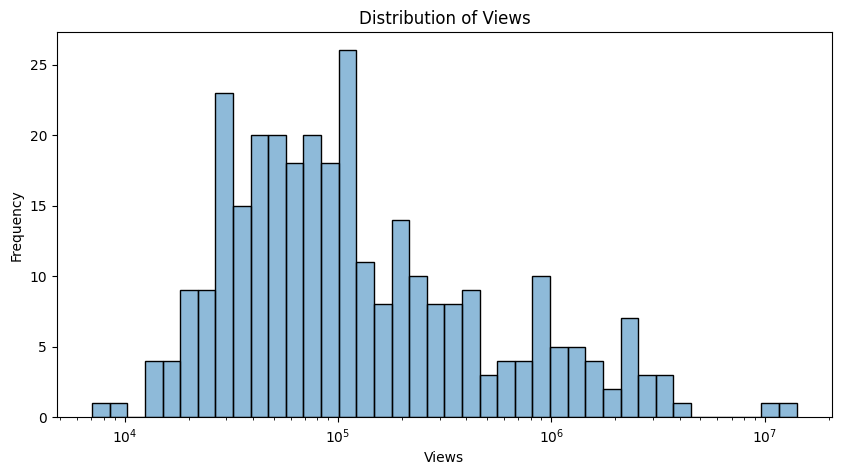

In [165]:
plt.figure(figsize=(10,5))
sns.histplot(df['view_count'], bins=40, kde=True, log_scale=True)
plt.title("Distribution of Views")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()

### Histogram of Likes

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


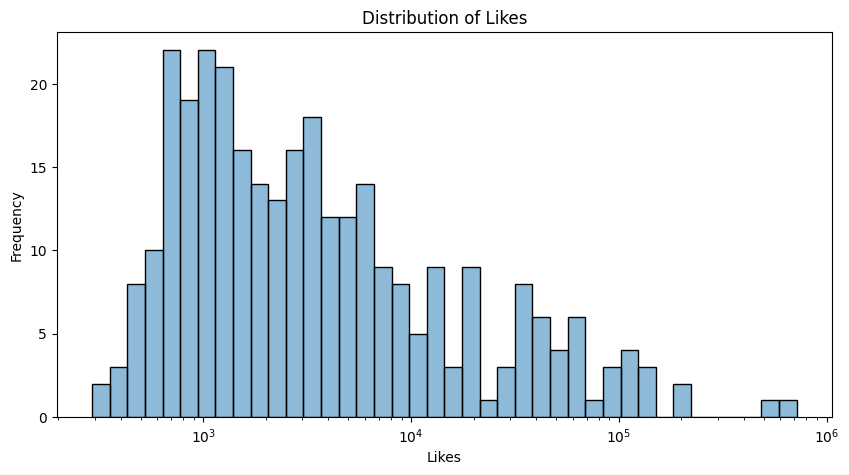

In [167]:
plt.figure(figsize=(10,5))
sns.histplot(df['like_count'], bins=40, kde=True, log_scale=True)
plt.title("Distribution of Likes")
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.show()

### Corelation Heatmap

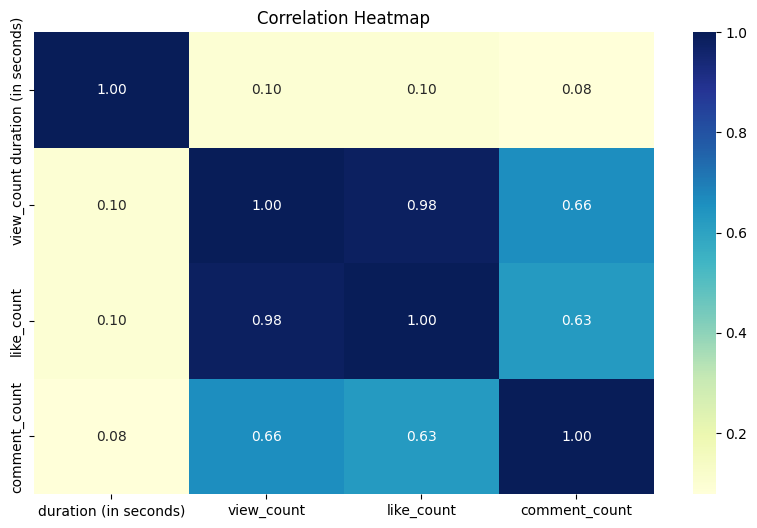

In [169]:
plt.figure(figsize=(10,6))
corr_matrix = df[['duration (in seconds)', 'view_count', 'like_count', 'comment_count']].corr()

sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Top 5 best shorts by likes

In [177]:
top5 = df.nlargest(5, 'like_count')
cols = ['video_id','title','published_date','view_count','like_count','comment_count','duration','total_seconds']
cols = [c for c in cols if c in top5.columns]

In [179]:
display(top5[cols].reset_index(drop=True))

,title,published_date,view_count,like_count,comment_count
0,How did cold messaging help Ranveer get @tanma...,2024-07-30,14143525,717842,927
1,Why Apple Inc. chose INDIA over CHINA? @ThinkS...,2023-04-28,10527523,518376,3550
2,"Manyavar vs ZARA, H&M?",2024-11-15,2960118,193380,543
3,How Fogg (the deodorant) used a Simple Marketi...,2023-08-05,3608851,186722,655
4,Can UP become 1 Trillion Dollar Economy?,2024-05-11,3863749,150580,2080


### Likes Ratio (average likes / average views)

In [184]:
avg_likes = df['like_count'].mean()
avg_likes

np.float64(16313.522580645162)

In [185]:
avg_views = df['view_count'].mean()
avg_views

np.float64(415452.4741935484)

In [186]:
like_ratio = avg_likes/avg_views
like_ratio

np.float64(0.03926688031479895)

### Comments Ratio (average comments / average views)

In [188]:
avg_comments = df['comment_count'].mean()
avg_comments

np.float64(128.76129032258063)

In [189]:
comment_ratio = avg_comments/avg_views
comment_ratio

np.float64(0.0003099302527263182)